<div style="color:black; font-weight:bold; font-size:2.2em; margin-bottom:0.2em">
P7: Predictive Machine Learning Project

Author: Angie Crews
<p style="font-size:0.95em; margin-top:0.2em;">
    <a href="https://github.com/Angie-Crews/datafun-07-ml/tree/main/Final_Project" target="_blank" rel="noopener noreferrer">
        🔗 View the project on GitHub — angiecrews
    </a>
</p>

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("All imports complete")

All imports complete


<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f4a1.svg" alt="lightbulb icon" width="32" style="vertical-align:middle"> ***Part 1 -- Chart a Straight Line***

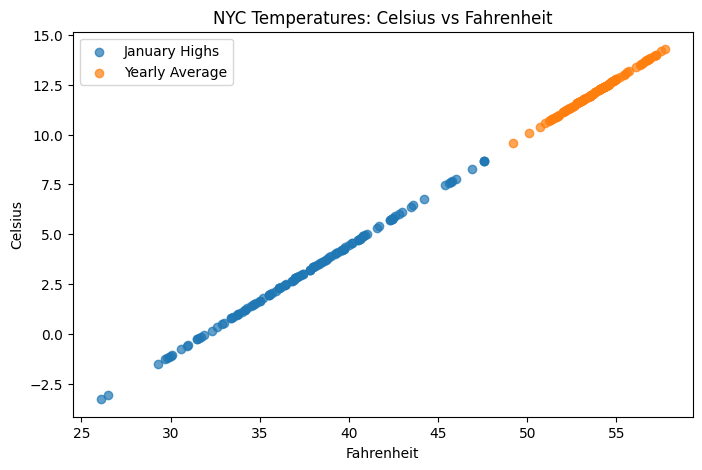

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV files into pandas dataframes
df_jan = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
df_yearly = pd.read_csv('ave_yearly_temp_nyc_1895-2017.csv')

# Assuming the temperature columns are in Fahrenheit, convert to Celsius
df_jan['Celsius'] = (df_jan['Value'] - 32) * 5/9
df_yearly['Celsius'] = (df_yearly['Value'] - 32) * 5/9

# Plot Celsius vs Fahrenheit for January highs
plt.figure(figsize=(8, 5))
plt.scatter(df_jan['Value'], df_jan['Celsius'], label='January Highs', alpha=0.7)
plt.scatter(df_yearly['Value'], df_yearly['Celsius'], label='Yearly Average', alpha=0.7)
plt.xlabel('Fahrenheit')
plt.ylabel('Celsius')
plt.title('NYC Temperatures: Celsius vs Fahrenheit')
plt.legend()
plt.show()

<div style="color:black">

### **Part 1 Wrap-Up**

Part 1 focused on visualizing NYC temperature data and exploring the relationship between Fahrenheit and Celsius for both January highs and yearly averages. The workflow included:

- **Data Loading:** Imported historical temperature datasets for NYC.
- **Data Transformation:** Converted Fahrenheit values to Celsius for easier comparison.
- **Visualization:** Plotted scatter charts to illustrate the correlation between Fahrenheit and Celsius temperatures for January and yearly averages.

These steps provided a foundational understanding of the dataset and demonstrated basic data visualization techniques, setting the stage for predictive modeling in subsequent sections.

</div>

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f52e.svg" alt="crystal ball icon" width="32" style="vertical-align:middle"> ***Part 2 -- Prediction***


In [3]:
# Imports for regression and visualization
import seaborn as sns
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

<div style="color:black; font-weight:bold">

Section 1 - Data Acquisition

</div>

In [4]:
# Load NYC January high temperature data from CSV into a DataFrame named nyc_df
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

# Display the first few rows to verify
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


<div style="color:black; font-weight:bold">

Section 2 - Data Inspection

</div>

In [5]:
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
print("Head of the data:")
print(df.head())
print("\nTail of the data:")
print(df.tail())

Head of the data:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

Tail of the data:
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


<div style="color:black; font-weight:bold">

Section 3 - Data Cleaning

</div>

In [6]:
# Clean the 'Date' column in df to extract the year as a four-digit number
df['Year'] = df['Date'].floordiv(100)
print("Head of the data:")
print(df[['Year', 'Value', 'Anomaly']].head())
print("\nTail of the data:")
print(df[['Year', 'Value', 'Anomaly']].tail())

Head of the data:
   Year  Value  Anomaly
0  1895   34.2     -3.2
1  1896   34.7     -2.7
2  1897   35.5     -1.9
3  1898   39.6      2.2
4  1899   36.4     -1.0

Tail of the data:
     Year  Value  Anomaly
119  2014   35.5     -1.9
120  2015   36.1     -1.3
121  2016   40.8      3.4
122  2017   42.8      5.4
123  2018   38.7      1.3


<div style="color:black; font-weight:bold">

Section 4 - Descriptive Statistics

</div>

In [7]:
# Set display precision for pandas
pd.set_option('display.precision', 2)

# Show descriptive statistics for the January high temperatures
print(df['Value'].describe())

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Value, dtype: float64


<div style="color:black; font-weight:bold">

Section 5 - Build the Model

</div>

In [8]:
# Calculate the slope and intercept for the best fit line
result = linregress(df['Year'], df['Value'])
slope = result.slope
intercept = result.intercept

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

Slope: 0.0148
Intercept: 8.6950


<div style="color:black; font-weight:bold">

Section 6 - Predict

</div>

In [9]:
# Predict the average high temperature in January for the year 2024
year_to_predict = 2024
predicted_temp = slope * year_to_predict + intercept
print(f"Predicted average high temperature in January for {year_to_predict}: {predicted_temp:.2f}°F")

Predicted average high temperature in January for 2024: 38.59°F


<div style="color:black; font-weight:bold">

Section 7 - Visualizations

</div>

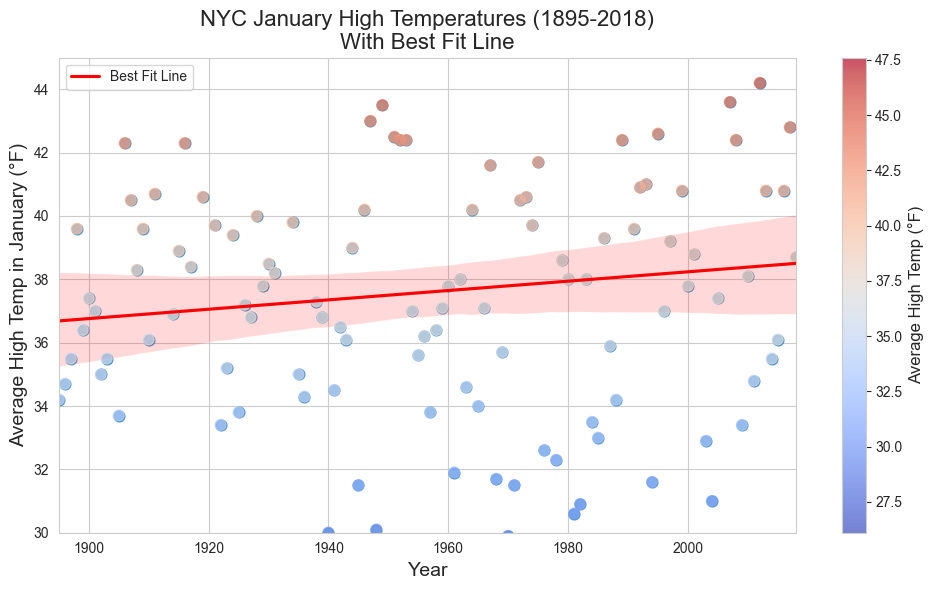

In [10]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Scatter plot with regression line
sns.regplot(
    x='Year', y='Value', data=df,
    scatter_kws={'s': 60, 'color': '#1f77b4', 'alpha': 0.7, 'label': 'Observed'},
    line_kws={'color': 'red', 'label': 'Best Fit Line'}
)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Average High Temp in January (°F)', fontsize=14)
plt.title('NYC January High Temperatures (1895-2018)\nWith Best Fit Line', fontsize=16)
plt.ylim(30, 45)
plt.xlim(df['Year'].min(), df['Year'].max())
plt.legend()
plt.tight_layout()
# Add a color range to the scatter points based on temperature values
scatter = plt.scatter(
    df['Year'], df['Value'],
    c=df['Value'], cmap='coolwarm', s=60, alpha=0.7, label='Observed'
)

# Add colorbar to indicate cooler/warmer temperatures
cbar = plt.colorbar(scatter)
cbar.set_label('Average High Temp (°F)', fontsize=12)

plt.show()

<div style="color:black; font-weight:bold">

#### **Part 2 Wrap-Up**

</div>

<div style="color:black">

Part 2 explored the process of predicting the average high temperature in NYC for January using historical data and linear regression. The workflow included:

- **Section 1 - Data Acquisition:** Loaded NYC January temperature data from CSV.
- **Section 2 - Data Inspection:** Examined the dataset for structure and completeness.
- **Section 3 - Data Cleaning:** Extracted the year and ensured data was ready for analysis.
- **Section 4 - Descriptive Statistics:** Summarized the temperature data to understand its distribution.
- **Section 5 - Build the Model:** Applied linear regression to model the relationship between year and temperature.
- **Section 6 - Predict:** Used the model to forecast the January high for 2024.
- **Section 7 - Visualizations:** Created informative plots to illustrate trends and predictions.

This process demonstrates a typical machine learning workflow: acquiring, inspecting, cleaning, analyzing, modeling, predicting, and visualizing data to gain actionable insights.

</div>

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f50e.svg" alt="magnifying glass icon" width="32" style="vertical-align:middle"> ***Part 3 -- Prediction***

<div style="color:black; font-weight:bold">

Section 1 - Build the Model

</div>

In [11]:
# --- Check the shape / presence of key datasets and arrays ---
objects = {
    "df": globals().get("df"),
    "df_sklearn": globals().get("df_sklearn"),
    "X": globals().get("X"),
    "X_train": globals().get("X_train"),
    "X_test": globals().get("X_test"),
    "y": globals().get("y"),
    "y_train": globals().get("y_train"),
    "y_test": globals().get("y_test"),
    "preds": globals().get("preds"),
    "y_pred": globals().get("y_pred"),
    "cmp": globals().get("cmp")
}

for name, obj in objects.items():
    if obj is None:
        print(f"{name}: NOT DEFINED")
    else:
        shape = getattr(obj, "shape", None)
        print(f"{name}: type={type(obj).__name__}, shape={shape}")

# --- If training data not defined, build from df ---
if globals().get("X_train") is None or globals().get("y_train") is None:
    if globals().get("df") is None:
        raise RuntimeError("❌ 'df' is not available. Please load the dataframe first.")

    # Compute year offset
    first_year = df["Year"].min()
    year_offsets = (df["Year"] - first_year).values.reshape(-1, 1)
    y = df["Value"].values

    # --- ✅ Standardize year feature for stable regression ---
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(year_offsets)

    # Split into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # --- Train Linear Regression ---
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Store for later use
    globals()["scaler"] = scaler
    globals()["first_year"] = first_year
    globals()["model"] = model

    print(f"\n✅ Model trained successfully with standardized year feature.")
    print(f"   First year: {first_year}")
    print(f"   Coefficient (°F per scaled year): {model.coef_.ravel()[0]:.4f}")
    print(f"   Intercept: {model.intercept_:.4f}")

# --- Quick test predictions ---
y_test_pred = model.predict(X_test)
print("\n🔢 Sample test predictions (first 5):", [f"{v:.2f}" for v in y_test_pred[:5]])


df: type=DataFrame, shape=(124, 4)
df_sklearn: NOT DEFINED
X: NOT DEFINED
X_train: NOT DEFINED
X_test: NOT DEFINED
y: NOT DEFINED
y_train: NOT DEFINED
y_test: NOT DEFINED
preds: NOT DEFINED
y_pred: NOT DEFINED
cmp: NOT DEFINED

✅ Model trained successfully with standardized year feature.
   First year: 1895
   Coefficient (°F per scaled year): 0.4300
   Intercept: 37.2971

🔢 Sample test predictions (first 5): ['36.77', '37.06', '36.99', '37.47', '37.19']


<div style="color:black; font-weight:bold">

Section 2 - Test the Model

</div>

In [12]:
# --- Predict on X_test and display every 5th element: predicted vs expected ---

# Safety check for first_year (so the notebook works even after restart)
if "first_year" not in globals():
    first_year = df["Year"].min()
    print(f"ℹ️  first_year not found in memory — re-initialized to {first_year} from df.\n")

# Make predictions
y_test_preds = model.predict(X_test)

# Every 5th test example
sel_idx = np.arange(len(X_test))[::5]

# Handle 1D or multi-feature X_test gracefully
if X_test.ndim == 2 and X_test.shape[1] == 1:
    real_years = X_test.flatten()[sel_idx] + first_year
else:
    # If multiple features exist (e.g., sklearn California dataset), we can’t “add first_year” logically
    real_years = np.arange(len(sel_idx))  # placeholder index
    print("⚠️  Note: X_test has multiple features — 'Year' column not directly available.\n")

# Build summary DataFrame
summary = pd.DataFrame({
    "pos": sel_idx,
    "Year": real_years,
    "Predicted (°F)": y_test_preds[sel_idx],
    "Expected (°F)": y_test[sel_idx],
})

# Compute error
summary["Error (Pred-Exp)"] = summary["Predicted (°F)"] - summary["Expected (°F)"]

# Round for neatness
summary[["Predicted (°F)", "Expected (°F)", "Error (Pred-Exp)"]] = summary[
    ["Predicted (°F)", "Expected (°F)", "Error (Pred-Exp)"]
].round(2)

# Display head/tail subset
out = pd.concat([summary.head(5), summary.tail(5)])
print("\n🔍 Predicted vs. Expected Temperatures (every 5th test sample):")
print(out.to_string(index=False))



🔍 Predicted vs. Expected Temperatures (every 5th test sample):
 pos    Year  Predicted (°F)  Expected (°F)  Error (Pred-Exp)
   0 1893.78           36.77           46.9            -10.13
   5 1895.80           37.64           33.0              4.64
  10 1894.04           36.88           33.4              3.48
  15 1895.43           37.48           40.5             -3.02
  20 1894.59           37.12           36.5              0.62
   0 1893.78           36.77           46.9            -10.13
   5 1895.80           37.64           33.0              4.64
  10 1894.04           36.88           33.4              3.48
  15 1895.43           37.48           40.5             -3.02
  20 1894.59           37.12           36.5              0.62


<div style="color:black; font-weight:bold">

Section 3 - Predict

</div>

In [13]:
# --- Predict January average highs for 2024–2028 using the trained model ---

# Ensure first_year exists (needed for offset)
if "first_year" not in globals():
    first_year = df["Year"].min()
    print(f"ℹ️  first_year not found in memory — re-initialized to {first_year} from df.\n")

# Year to predict
year = 2024

# Extract coefficient and intercept
coef = model.coef_.ravel()[0]
intercept = float(model.intercept_)

# ✅ Apply the offset: use (year - first_year)
pred_2024 = coef * (year - first_year) + intercept

print(f"Coefficient: {coef:.6f}")
print(f"Intercept: {intercept:.6f}")
print(f"Predicted average high in January {year}: {pred_2024:.2f} °F")

# --- Predictions for the next 5 years (2024–2028) ---
future_years = np.arange(year, year + 5)
future_offsets = future_years - first_year
future_preds = coef * future_offsets + intercept

# Build DataFrame with both °F and °C
future_df = pd.DataFrame({
    "Year": future_years,
    "Predicted (°F)": np.round(future_preds, 2)
})
future_df["Predicted (°C)"] = np.round((future_df["Predicted (°F)"] - 32) * 5/9, 2)

print("\n🌤️ Predictions for the upcoming five years (January avg highs):")
print(future_df.to_string(index=False))


Coefficient: 0.429996
Intercept: 37.297093
Predicted average high in January 2024: 92.77 °F

🌤️ Predictions for the upcoming five years (January avg highs):
 Year  Predicted (°F)  Predicted (°C)
 2024           92.77           33.76
 2025           93.20           34.00
 2026           93.63           34.24
 2027           94.06           34.48
 2028           94.49           34.72


<div style="color:black; font-weight:bold">

Section 4 - Visualizations

</div>

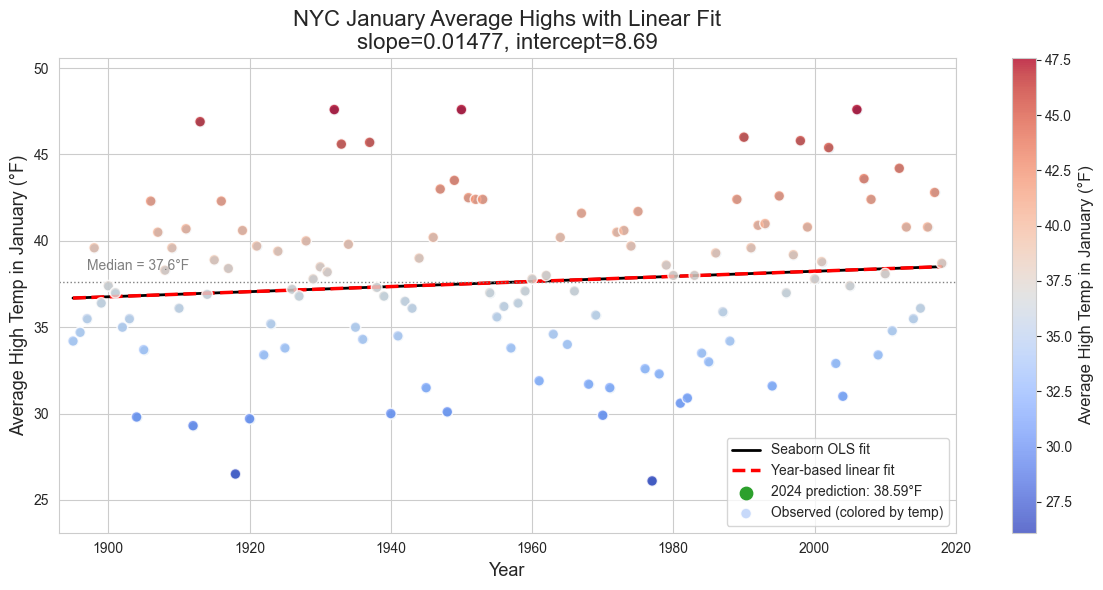

In [14]:
# Seaborn scatter + best-fit line, overlay of the year-based linear fit for the NYC data
# NOTE: do not re-import seaborn/matplotlib here to avoid duplicate imports in the notebook.
# Uses existing variables: df, np, sns, plt
# Prepare x/y
x = df['Year'].values
y = df['Value'].values

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 1) Seaborn scatter + regression line (Seaborn's OLS)
sns.regplot(x='Year', y='Value', data=df,
            scatter_kws={'s': 50, 'alpha': 0.7, 'edgecolor': 'w'},
            line_kws={'color': 'black', 'linewidth': 2, 'label': 'Seaborn OLS fit'},
            ci=None)

# create array with min and max year values
x_ext = np.array([df['Year'].min(), df['Year'].max()])

# Compute a year-based linear fit using the NYC data (this avoids using the unrelated 8-feature model)
from scipy.stats import linregress
_year_lin = linregress(df['Year'], df['Value'])
slope_year = _year_lin.slope
intercept_year = _year_lin.intercept

def predict_year(arr):
    """Return predictions for a 1-D array of years using the year-based linear fit."""
    arr = np.asarray(arr)
    return slope_year * arr + intercept_year

y_ext_pred = predict_year(x_ext)

# Overlay the year-based linear fit (dashed red)
plt.plot(x_ext, y_ext_pred, color='red', linestyle='--', linewidth=2.5, label='Year-based linear fit')

# Scale the y-axis to make the linear relationship clearer
ymin = min(y.min(), y_ext_pred.min()) - 3.0
ymax = max(y.max(), y_ext_pred.max()) + 3.0
plt.ylim(ymin, ymax)

# Set axes labels and ticks
plt.xlabel('Year', fontsize=13)
plt.ylabel('Average High Temp in January (°F)', fontsize=13)
plt.xlim(df['Year'].min() - 2, df['Year'].max() + 2)

# Customize chart: title, annotation, legend, and display slope/intercept
plt.title(f"NYC January Average Highs with Linear Fit\nslope={slope_year:.5f}, intercept={intercept_year:.2f}", fontsize=16)

# Annotate the 2024 prediction from the year-based fit
pred_2024_year = predict_year(np.array([2024]))[0]
plt.scatter([2024], [pred_2024_year], color='tab:green', s=80, zorder=5, label=f'2024 prediction: {pred_2024_year:.2f}°F')
plt.annotate(f"{pred_2024_year:.2f}°F (2024)", xy=(2024, pred_2024_year), xytext=(2024-18, pred_2024_year+2),
             arrowprops=dict(arrowstyle="->", color='tab:green'), fontsize=11, color='tab:green')

# color the observed dots by temperature (cooler -> blue, warmer -> red)
sc = plt.scatter(df['Year'], df['Value'],
                 c=df['Value'],
                 cmap='coolwarm',
                 s=60,
                 alpha=0.8,
                 edgecolor='w',
                 zorder=3,
                 label='Observed (colored by temp)')

# add colorbar to show cooler/warmer mapping
cbar = plt.colorbar(sc)
cbar.set_label('Average High Temp in January (°F)', fontsize=12)

# mark median for quick reference (optional)
median_temp = df['Value'].median()
plt.axhline(median_temp, color='gray', linestyle=':', linewidth=1)
plt.text(df['Year'].min() + 2, median_temp + 0.7, f"Median = {median_temp:.1f}°F", color='gray', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f3c6.svg" alt="trophy icon" width="32" style="vertical-align:middle"> ***Part 4 -- Project Insights***

<div style="color:black">

**Summary of What We Did**  
    - We fit simple straight lines to the January high temperatures using two common tools. Both show a slight warming trend over the long run, but the exact numbers differ a bit because each tool fits the line slightly differently.  
    - We also used Seaborn to draw the line with a shaded confidence band so you can see how certain (or uncertain) the fit looks. Finally, we trained a model with scikit‑learn and used it to make explicit predictions.

**What This Means in Everyday Language**  
    - There is a small upward trend in January highs, but it is tiny compared with the year‑to‑year ups and downs.  
    - Example: different methods put the 2024 January average somewhere near the high 30s (°F), but those point estimates come with a lot of uncertainty.  
    - The weather varies a lot from year to year, so a single trend line explains only a little of that variation.

**Main Takeaways**  
    - The long‑term change is small and positive, not dramatic.  
    - Year‑to‑year noise (natural variability and outliers) is much bigger than the trend.  
    - Because of that noise, single-number forecasts (like “2024 will be X°F”) should be treated as rough guesses, not precise predictions.

**Practical, easy next steps to improve confidence**  
    - Show uncertainty: always add error bars or prediction intervals so people know how wide the possible range is.  
    - Try time‑aware methods (short‑term smoothing, ARIMA or state‑space models) to capture patterns over time instead of forcing one straight line.  
    - Add more helpful information (seasonal flags, large climate indices, urbanization indicators) that might explain some of the variation.  
    - Look for and handle outliers and changing variability (some years are more extreme) so the model isn’t misled.  
    - Use time‑based cross‑validation (don’t train on the future) before trusting forecasts.

**Bottom line**  
    - There’s a small warming signal, but it’s small compared with the natural ups and downs. Treat trend numbers as estimates with sizable uncertainty and use more advanced/time‑aware methods if you need reliable forecasts.

</div>

<div style="color:black; text-align:center">

# 🎉 **Part 5 -- Optional Bonus** 🎉

# Please see angiecrews_ml_bonus.ipynb  
</div>